In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence
data_path = "./data/"

[1-3] Infection.csv는 병원에서의 감염위험에 대한 데이터이다. 아래의 변수들을 사용하여 회귀분석을 시행하고자 한다. 


    Y = InfctRsk: infection risk in hospital
    X1 = Stay: average length of patient’s stay (in days)
    X2 = Xray: a measure of frequency of giving X-rays
    X3 = Region: indication in which of 4 U.S. regions the hospital is located: north-east(1), north-central(2), south(3), west(4).


In [5]:
data = pd.read_csv(data_path + "infection.csv", index_col=0)
data

,Stay,Age,InfctRsk,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
ID,,,,,,,,,,,
1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...
109,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
110,9.50,49.3,5.8,42.0,70.9,98,2,3,68,46,22.9
111,7.70,56.9,4.4,12.2,67.9,129,2,4,85,136,62.9


1.	고려하고 있는 네 개의 변수 간의 산점도행렬을 확인하여라. 이상치가 발견되는가? Stay 변수를 기준으로 가장 큰 두 관측치를 제외하고 아래의 분석을 진행하기로 한다.

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


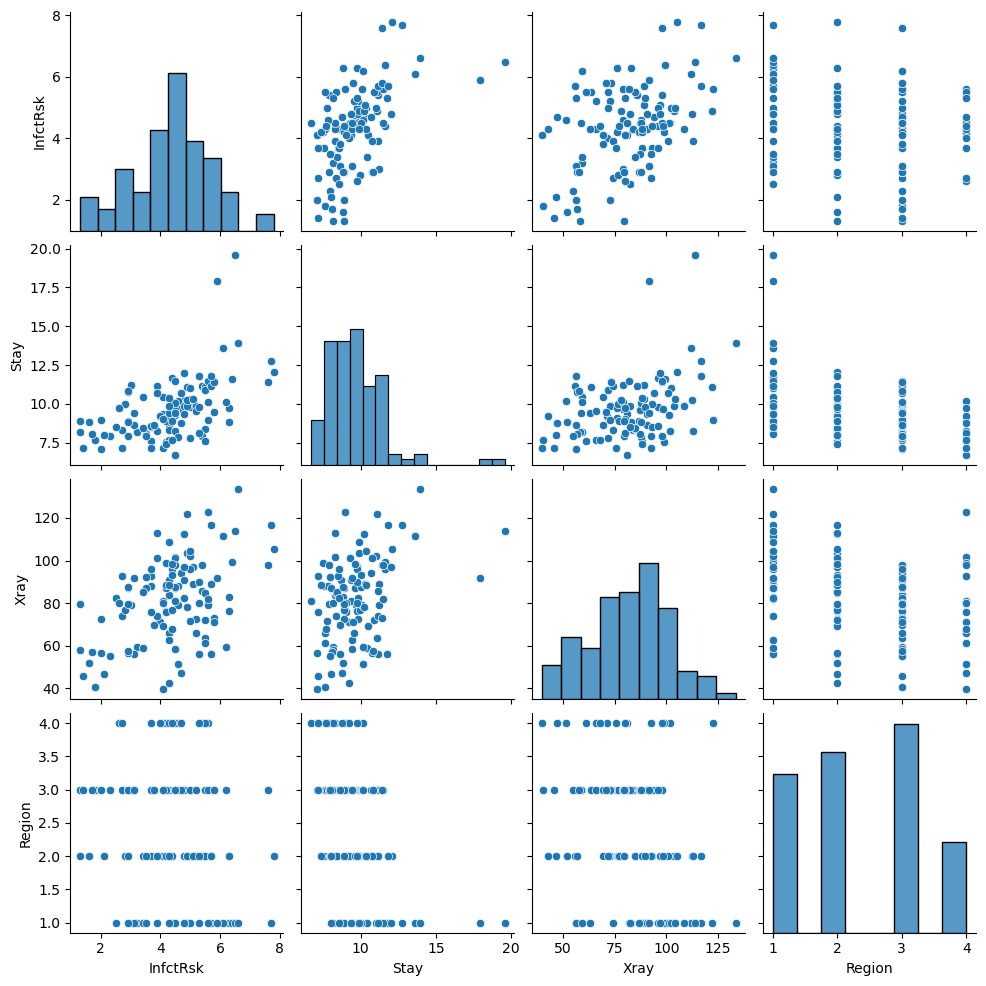

<Figure size 500x500 with 0 Axes>

In [6]:
sns.pairplot(data, vars = ['InfctRsk','Stay','Xray','Region'])
plt.figure(figsize=(5,5))
plt.show()

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


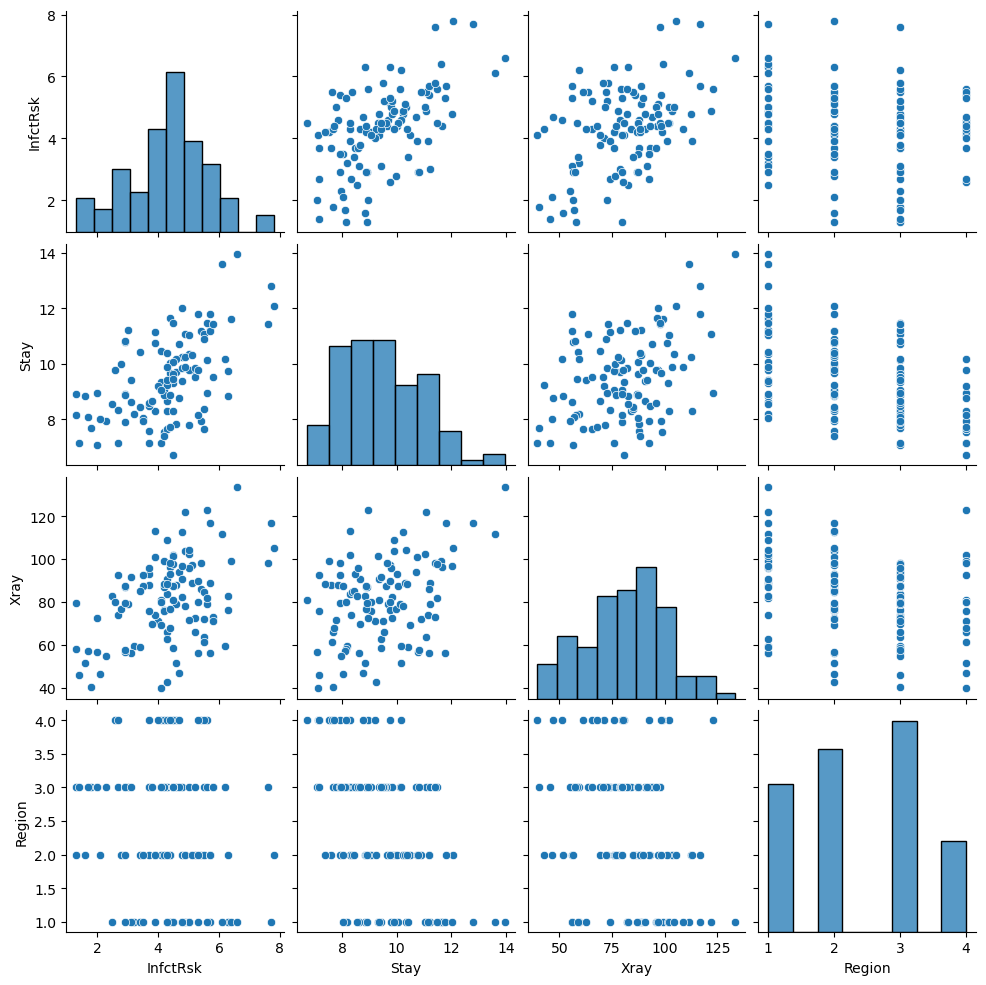

In [7]:
data2 = data.loc[data.Stay<15,:]
sns.pairplot(data2, vars = ['InfctRsk','Stay','Xray','Region'])
plt.show()

2.	Infection risk를 나머지 세 변수로 셜명하는 모형을 적합하여라. 각 회귀계수의 유의성을 테스트 하고 유의한 계수의 의미를 해석하시오. 

In [8]:
model = smf.ols('InfctRsk ~ Stay+Xray+Region ', data = data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     22.64
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.99e-11
Time:                        15:17:03   Log-Likelihood:                -161.29
No. Observations:                 111   AIC:                             330.6
Df Residuals:                     107   BIC:                             341.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4089      0.960     -2.510      0.014      -4.311      -0.507
Stay           0.4790      0.082      5.839      0.000       0.316       0.642
Xray           0.0199      0.006      3.505      0.001       0.009       0.031
Region         0.2405      0.117      2.064      0.041       0.010       0.471
==============================================================================
Omnibus:                        0.250   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.368
Skew:                          -0.103   Prob(JB):                        0.832
Kurtosis:                       2.807   Cond. No.                         811.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# region => 범주형 변수라고 인식해주기 => Region에 대한 dummy varibales만들어짐
model = smf.ols('InfctRsk ~ Stay + Xray + C(Region) ', data = data2).fit()
model.summary()
# 현재 reference level : Region의 1지역(intercept)
# Stay와 Xray가 동일하게 유지될 때 Region에 의해서 얼마나 차이가 나는지 확인
# 1지역에 비해서 2,3 region은 유의미한 차이가 없다.(귀무가설 기각X)
# 1지역에 비해서 4 region은 유의미한 차이가 있다.(귀무가설 기각O)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     15.19
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           3.24e-11
Time:                        15:17:33   Log-Likelihood:                -158.35
No. Observations:                 111   AIC:                             328.7
Df Residuals:                     105   BIC:                             345.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.1343      0.877     -2.433      0.017      -3.874      -0.395
C(Region)[T.2]     0.1713      0.281      0.609      0.544      -0.387       0.729
C(Region)[T.3]     0.0955      0.289      0.330      0.742      -0.477       0.668
C(Region)[T.4]     1.0578      0.378      2.798      0.006       0.308       1.807
Stay               0.5054      0.081      6.205      0.000       0.344       0.667
Xray               0.0176      0.006      3.113      0.002       0.006       0.029
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.134
Skew:                          -0.078   Prob(JB):                        0.935
Kurtosis:                       3.070   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# 각 카테고리에 네이밍을 해주면 좀 더 쉽게 해석가능함
data2['Region_c'] = data2.Region.astype('category')
data2.Region_c = data2.Region_c.cat.rename_categories(['north-east','north-central','south','west'])
data2['Region_c'].unique()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28448\529674507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Region_c'] = data2.Region.astype('category')
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28448\529674507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Region_c = data2.Region_c.cat.rename_categories(['north-east','north-central','south','west'])


['west', 'north-central', 'south', 'north-east']
Categories (4, object): ['north-east', 'north-central', 'south', 'west']

In [26]:
model = smf.ols('InfctRsk ~ Stay + Xray + Region_c ', data = data2).fit()
model.summary().tables[1]

# reference level : north-east(-2.1343)
# Stay와 Xray가 주는 효과를 제외하고 나서(Stay와 Xray가 동일할 때) 
# 오로지 지역 차이에 의해서 설명되는 모델 만드는게 목적)
# west의 차이가 가장 크다.(reference level인 north-east에 비해서 1.0578보다 크다)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.1343,0.877,-2.433,0.017,-3.874,-0.395
Region_c[T.north-central],0.1713,0.281,0.609,0.544,-0.387,0.729
Region_c[T.south],0.0955,0.289,0.330,0.742,-0.477,0.668
Region_c[T.west],1.0578,0.378,2.798,0.006,0.308,1.807
Stay,0.5054,0.081,6.205,0.000,0.344,0.667
Xray,0.0176,0.006,3.113,0.002,0.006,0.029


3. Region이 west인 지역을 reference level로 사용하여 모형을 다시 적합하고 유의한 회귀계수의 의미를 해석하시오. B의 결과와 어떻게 다른가? 

In [29]:
model2 = smf.ols('InfctRsk ~ Stay + Xray + C(Region_c, Treatment(reference = "west")) ', data = data2).fit()
model2.summary().tables[1]
# 제일 감염 위험이 높은 순 => west > north-central > south > north-east

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.0764,0.721,-1.492,0.139,-2.507,0.354
"C(Region_c, Treatment(reference=""west""))[T.north-east]",-1.0578,0.378,-2.798,0.006,-1.807,-0.308
"C(Region_c, Treatment(reference=""west""))[T.north-central]",-0.8866,0.340,-2.608,0.010,-1.560,-0.213
"C(Region_c, Treatment(reference=""west""))[T.south]",-0.9624,0.323,-2.976,0.004,-1.604,-0.321
Stay,0.5054,0.081,6.205,0.000,0.344,0.667
Xray,0.0176,0.006,3.113,0.002,0.006,0.029


[4-6] 5개의 설명변수를 가진 자료가 있다. 종속변수는 졸업 후의 초봉(단위:1천달러)이다. 설명변수와 그 계수추정값은 아래와 같다.

|     변수           |     설명                     |     계수추정치    |
|--------------------|------------------------------|-------------------|
|     (intercept)    |                              |     50            |
|     X1             |     GPA                      |     20            |
|     X2             |     IQ                       |     0.07          |
|     X3             |     성별(여성=1, 남성=0)     |     35            |
|     X4             |     GPA와 IQ의 교호작용      |     0.01          |
|     X5             |     GPA와 성별의 교호작용    |     -10           |



4. 아래 설명 중 어느것이 옳은 답이고, 그 이유는 무엇인가?
    1. 고정된 값의 IQ와 GPA에 대해, 남성이 여성보다 평균적으로 수입이 더 많다. 
    2. 고정된 값의 IQ와 GPA에 대해, 여성이 남성보다 평균적으로 수입이 더 많다.
    3. 고정된 값의 IQ와 GPA에 대해, GPA가 충분히 높다면 남성이 여성보다 평균적으로 수입이 더 많다. 
    4. 고정된 값의 IQ와 GPA에 대해, GPA가 충분히 높다면 여성이 남성보다 평균적으로 수입이 더 많다.

- y = 50 + 20*GPA + 0.07*IQ + 0.01*GPA*IQ + (35-10*GPA)*D_f
- 여자 : y = 50 + 20*GPA + 0.07*IQ + 0.01*GPA*IQ + (35-10*GPA)
- 남자 : y = 50 + 20*GPA + 0.07*IQ + 0.01*GPA*IQ
    
- 답 : C
- 이유 : 여성일 경우 X3이 1이 되므로 남성과 수입이 35-10*IQ만큼 차이가 난다. GPA가 3.5보다 크면 남성이 여성보다 수입이 더 많게 된다. A,B는 main effect에 대한 해석일 뿐이다.

5. IQ가 110이고 GPA가 4.0인 여성의 급여를 예측하라. 

In [33]:
IQ = 110
GPA = 4.0
D_f = 1
y = 50 + 20*GPA + 0.07*IQ + 0.01*GPA*IQ + (35-10*GPA)
print(y)

137.1


6.	GPA/IQ 교호작용 항에 대한 계수가 아주 작으므로 교호작용 효과가 있다는 증거는 거의 없다. 참인가 거짓인가? 답에 대한 근거를 설명하여라.

- 답 : 거짓이다. 교호작용 효과를 판단할 수 없다.
- 이유 : 교호작용 항의 P_value 값이 유의 수준보다 클 경우에 교호작용 효과의 증거가 없다고 판단한다. 항에 대한 계수가 작더라도 P_value가 유의 수준보다 작다면 교호작용 항은 유의하고 교호작용 효과가 있다고 판단한다.
- 회귀 계수는 x가 1단위 증가할 때 y가 증가하는 양을 의미한다. 변수마다 scale이 다르기 때문에 계수만을 가지고 비교하는 것은 의미가 없다. 즉, 유의성은 회귀 계수의 절대적인 크기가 아니라 p_value를 보고 판단해야 한다.